In [ ]:
import pandas as pd
data = pd.read_csv('olive_all_real.csv',encoding='utf-8-sig')

In [ ]:
data = data.iloc[:,1:]
data = data.drop(columns=['positive_prob','negative_prob','sentiment_score','predicted_sentiment','actual_sentiment','select_1_content','select_2_title','select_2_content','select_3_title','select_3_content'])

In [ ]:
data_cleansing=data[data['big_category']=='클렌징']
data_cleansing_positive=data_cleansing[data_cleansing['rate']>=4]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=30, ngram_range=(2, 2)) ### 최대개수설정

tdm = cv.fit_transform(data_cleansing_positive['okt_tokens'])

# 단어와 그 빈도수를 담은 데이터프레임을 생성
word_count_tf = pd.DataFrame({'단어':cv.get_feature_names_out(),'빈도':tdm.sum(axis=0).flat})

# 단어 빈도수를 기준으로 내림차순으로 정렬
word_count_tf = word_count_tf.sort_values('빈도',ascending=False)

word_count_tf = word_count_tf.reset_index(drop=True)
word_count_tf.index = word_count_tf.index + 1
print(word_count_tf)

         단어     빈도
1     사용 하다  11870
2     구매 하다   5280
3   자다 지워지다   3949
4     써다 보다   2583
5     자극 없다   2568
6     정력 좋다   2457
7     하다 좋다   2382
8     좋다 같다   2259
9     하다 있다   2135
10    블랙 헤드   1956
11    세안 하다   1951
12   사용 해보다   1559
13    피부 자극   1502
14   클렌징 오일   1500
15    사용 있다   1460
16    추천 하다   1389
17    쓰다 있다   1350
18    하다 사용   1347
19    하다 제품   1258
20    제품 이다   1141
21    하다 하다   1132
22    각질 제거   1131
23    재다 하다   1098
24    아이 리무   1095
25    제품 사용   1094
26    생각 하다   1054
27    하다 같다   1019
28   자극 순하다   1016
29    자다 사용   1002
30   추천 드리다    946


In [ ]:
# TF-IDF 변환
trans = TfidfTransformer()
dtm2 = trans.fit_transform(tdm)

# TF-IDF DataFrame 생성
df2 = pd.DataFrame({
    '단어': cv.get_feature_names_out(),
    'tf-idf': dtm2.sum(axis=0).flat
})

# TF-IDF 기준 정렬
df2 = df2.sort_values('tf-idf', ascending=False).reset_index(drop=True)
df2.index = df2.index + 1

print("🔹 2-gram TF-IDF 결과:\n", df2)

🔹 2-gram TF-IDF 결과:
          단어       tf-idf
1     사용 하다  3438.818265
2     구매 하다  2203.872788
3   자다 지워지다  2004.862058
4     정력 좋다  1370.097401
5     써다 보다  1341.526191
6     자극 없다  1340.048837
7     하다 좋다  1116.855742
8     좋다 같다  1111.615426
9     블랙 헤드   915.311344
10    세안 하다   876.362600
11    하다 있다   862.992517
12    쓰다 있다   809.244246
13    피부 자극   733.856497
14    추천 하다   723.726260
15   사용 해보다   711.369731
16    사용 있다   694.596937
17   자극 순하다   680.641835
18   클렌징 오일   640.012944
19    재다 하다   633.528855
20    하다 제품   596.026452
21    제품 이다   591.931060
22    하다 사용   582.185799
23    각질 제거   576.365937
24    아이 리무   547.146788
25    하다 하다   529.142616
26    자다 사용   512.279048
27    하다 같다   493.252439
28   추천 드리다   474.925100
29    생각 하다   470.675630
30    제품 사용   459.283635


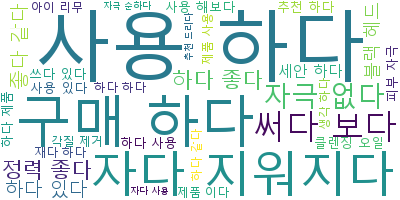

In [ ]:
# WordCloud 라이브러리를 임포트합니다. 텍스트 데이터의 빈도수를 시각화하기 위한 도구입니다.
from wordcloud import WordCloud

# 한글 폰트 경로를 지정합니다. WordCloud에서 한글을 정상적으로 표시하기 위한 준비 단계입니다.
font_path = '/content/malgun.ttf'

# WordCloud 객체를 생성합니다. 여기서는 배경색을 흰색으로, 최대 단어 수를 50개로 설정합니다.
wc = WordCloud(background_color='white', max_words=50, font_path=font_path)

# 단어 빈도 사전을 생성합니다. 이는 WordCloud생성에 사용될 데이터입니다.
count_dic = dict(zip(word_count_tf['단어'], word_count_tf['빈도']))

# WordCloud를 이용해 단어 빈도를 시각화합니다. 이는 가장 많이 사용된 단어를 시각적으로 확인하기 위한 단계입니다.
cloud = wc.fit_words(count_dic)
cloud.to_image()

In [ ]:
data_cleansing_negative=data_cleansing[data_cleansing['rate']<=2]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=30, ngram_range=(2, 2)) ### 최대개수설정

tdm = cv.fit_transform(data_cleansing_negative['okt_tokens'])

# 단어와 그 빈도수를 담은 데이터프레임을 생성
word_count_tf = pd.DataFrame({'단어':cv.get_feature_names_out(),'빈도':tdm.sum(axis=0).flat})

# 단어 빈도수를 기준으로 내림차순으로 정렬
word_count_tf = word_count_tf.sort_values('빈도',ascending=False)

word_count_tf = word_count_tf.reset_index(drop=True)
word_count_tf.index = word_count_tf.index + 1
print(word_count_tf)

          단어   빈도
1      사용 하다  547
2      구매 하다  347
3    자다 지워지다  213
4      써다 보다  142
5      블랙 헤드  134
6      하다 하다  120
7      하다 같다  117
8      피부 자극  108
9      민감 피부  104
10     재다 의사  100
11   자극 느껴지다   97
12     세안 하다   96
13     정력 좋다   92
14    자다 모르다   90
15     재다 매다   86
16     의사 없다   85
17     자극 있다   84
18     하다 사용   82
19     하다 피부   80
20     각질 제거   79
21     자극 없다   78
22  피부 뒤집어지다   77
23     쓰다 피부   75
24     생각 하다   74
25     효과 없다   73
26     하다 제품   73
27     하다 않다   71
28     제품 이다   71
29     별로 이다   70
30     하다 구매   70


In [ ]:
# TF-IDF 변환
trans = TfidfTransformer()
dtm2 = trans.fit_transform(tdm)

# TF-IDF DataFrame 생성
df2 = pd.DataFrame({
    '단어': cv.get_feature_names_out(),
    'tf-idf': dtm2.sum(axis=0).flat
})

# TF-IDF 기준 정렬
df2 = df2.sort_values('tf-idf', ascending=False).reset_index(drop=True)
df2.index = df2.index + 1

print("🔹 2-gram TF-IDF 결과:\n", df2)

🔹 2-gram TF-IDF 결과:
           단어      tf-idf
1      사용 하다  207.316842
2      구매 하다  151.241829
3    자다 지워지다  112.876367
4      써다 보다   80.792369
5      블랙 헤드   66.630316
6      하다 같다   61.670503
7    자극 느껴지다   59.328906
8      정력 좋다   56.151705
9      민감 피부   56.025245
10     하다 하다   55.414037
11    자다 모르다   54.873424
12     쓰다 피부   53.739492
13  피부 뒤집어지다   53.645934
14     자극 있다   52.559738
15     세안 하다   51.113119
16     피부 자극   50.469762
17     자극 없다   49.184776
18     재다 의사   49.038153
19     재다 매다   48.156623
20     각질 제거   45.220531
21     효과 없다   43.975596
22     별로 이다   42.839190
23     제품 이다   41.927343
24     의사 없다   41.076424
25     하다 피부   41.045985
26     생각 하다   40.347507
27     하다 제품   39.542592
28     하다 구매   38.272500
29     하다 사용   37.279491
30     하다 않다   31.780320


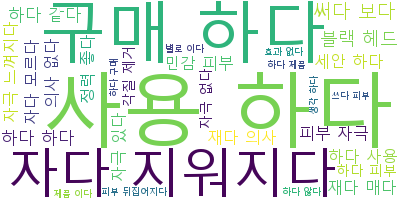

In [ ]:
# WordCloud 라이브러리를 임포트합니다. 텍스트 데이터의 빈도수를 시각화하기 위한 도구입니다.
from wordcloud import WordCloud

# 한글 폰트 경로를 지정합니다. WordCloud에서 한글을 정상적으로 표시하기 위한 준비 단계입니다.
font_path = '/content/malgun.ttf'

# WordCloud 객체를 생성합니다. 여기서는 배경색을 흰색으로, 최대 단어 수를 50개로 설정합니다.
wc = WordCloud(background_color='white', max_words=50, font_path=font_path)

# 단어 빈도 사전을 생성합니다. 이는 WordCloud생성에 사용될 데이터입니다.
count_dic = dict(zip(word_count_tf['단어'], word_count_tf['빈도']))

# WordCloud를 이용해 단어 빈도를 시각화합니다. 이는 가장 많이 사용된 단어를 시각적으로 확인하기 위한 단계입니다.
cloud = wc.fit_words(count_dic)
cloud.to_image()

## 마스크팩

In [ ]:
import pandas as pd
data = pd.read_csv('olive_all_real.csv',encoding='utf-8-sig')

In [ ]:
data = data.iloc[:,1:]
data = data.drop(columns=['positive_prob','negative_prob','sentiment_score','predicted_sentiment','actual_sentiment','select_1_content','select_2_title','select_2_content','select_3_title','select_3_content'])

In [ ]:
data_mask = data[data['big_category']=='마스크팩']
data_mask_positive=data_mask[data_mask['rate']>=4]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=30, ngram_range=(2, 2)) ### 최대개수설정

tdm = cv.fit_transform(data_mask_positive['okt_tokens'])

# 단어와 그 빈도수를 담은 데이터프레임을 생성
word_count_tf = pd.DataFrame({'단어':cv.get_feature_names_out(),'빈도':tdm.sum(axis=0).flat})

# 단어 빈도수를 기준으로 내림차순으로 정렬
word_count_tf = word_count_tf.sort_values('빈도',ascending=False)

word_count_tf = word_count_tf.reset_index(drop=True)
word_count_tf.index = word_count_tf.index + 1
print(word_count_tf)

         단어    빈도
1     사용 하다  8619
2     구매 하다  4226
3     하다 좋다  2394
4     좋다 같다  2179
5     써다 보다  1981
6     하다 있다  1842
7     블랙 헤드  1664
8    사용 해보다  1269
9     자극 없다  1142
10    하다 사용  1093
11    효과 있다  1028
12    하다 하다  1003
13    효과 좋다   968
14    아이 패치   967
15    있다 좋다   924
16    토너 패드   871
17    하다 같다   861
18    사용 있다   833
19    추천 하다   809
20    되다 같다   807
21    하다 피부   775
22    하다 구매   774
23    재다 하다   743
24    각질 제거   733
25    쓰다 있다   730
26  꾸준하다 사용   712
27    있다 같다   702
28    생각 하다   694
29    피부 자극   687
30    하다 되다   655


In [ ]:
# TF-IDF 변환
trans = TfidfTransformer()
dtm2 = trans.fit_transform(tdm)

# TF-IDF DataFrame 생성
df2 = pd.DataFrame({
    '단어': cv.get_feature_names_out(),
    'tf-idf': dtm2.sum(axis=0).flat
})

# TF-IDF 기준 정렬
df2 = df2.sort_values('tf-idf', ascending=False).reset_index(drop=True)
df2.index = df2.index + 1

print("🔹 2-gram TF-IDF 결과:\n", df2)

🔹 2-gram TF-IDF 결과:
          단어       tf-idf
1     사용 하다  2755.548833
2     구매 하다  1761.514039
3     하다 좋다  1153.362784
4     써다 보다  1093.314896
5     좋다 같다  1063.987605
6     하다 있다   781.636975
7     블랙 헤드   770.510589
8     자극 없다   672.485727
9    사용 해보다   611.210249
10    효과 좋다   582.993642
11    효과 있다   541.877810
12    있다 좋다   507.406868
13    쓰다 있다   469.842169
14    아이 패치   468.267948
15    하다 사용   467.970640
16    하다 하다   466.380914
17    추천 하다   459.739583
18    되다 같다   443.737894
19    재다 하다   442.278035
20    하다 같다   440.460875
21    사용 있다   437.202273
22    하다 피부   414.651173
23    하다 구매   412.651682
24    토너 패드   384.019598
25    있다 같다   361.689288
26    각질 제거   360.177208
27    피부 자극   356.825749
28  꾸준하다 사용   355.810403
29    생각 하다   332.438506
30    하다 되다   318.759709


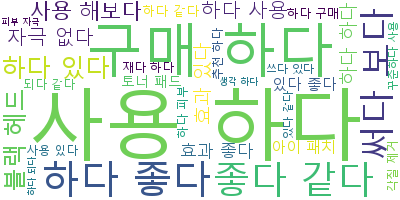

In [ ]:
# WordCloud 라이브러리를 임포트합니다. 텍스트 데이터의 빈도수를 시각화하기 위한 도구입니다.
from wordcloud import WordCloud

# 한글 폰트 경로를 지정합니다. WordCloud에서 한글을 정상적으로 표시하기 위한 준비 단계입니다.
font_path = '/content/malgun.ttf'

# WordCloud 객체를 생성합니다. 여기서는 배경색을 흰색으로, 최대 단어 수를 50개로 설정합니다.
wc = WordCloud(background_color='white', max_words=50, font_path=font_path)

# 단어 빈도 사전을 생성합니다. 이는 WordCloud생성에 사용될 데이터입니다.
count_dic = dict(zip(word_count_tf['단어'], word_count_tf['빈도']))

# WordCloud를 이용해 단어 빈도를 시각화합니다. 이는 가장 많이 사용된 단어를 시각적으로 확인하기 위한 단계입니다.
cloud = wc.fit_words(count_dic)
cloud.to_image()

In [ ]:
data_mask_negative=data_mask[data_mask['rate']<=2]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=30, ngram_range=(2, 2)) ### 최대개수설정

tdm = cv.fit_transform(data_mask_negative['okt_tokens'])

# 단어와 그 빈도수를 담은 데이터프레임을 생성
word_count_tf = pd.DataFrame({'단어':cv.get_feature_names_out(),'빈도':tdm.sum(axis=0).flat})

# 단어 빈도수를 기준으로 내림차순으로 정렬
word_count_tf = word_count_tf.sort_values('빈도',ascending=False)

word_count_tf = word_count_tf.reset_index(drop=True)
word_count_tf.index = word_count_tf.index + 1
print(word_count_tf)

          단어   빈도
1      사용 하다  683
2      구매 하다  427
3      써다 보다  229
4      블랙 헤드  176
5      하다 같다  146
6      효과 없다  144
7      하다 하다  137
8      재다 매다  130
9      재다 의사  127
10    자다 모르다  123
11     좋다 같다  123
12     자다 맞다  118
13     생각 하다  114
14     효과 있다  114
15     의사 없다   99
16     하다 사용   99
17     매다 하다   91
18     민감 피부   85
19     하다 있다   82
20     토너 패드   82
21     별로 이다   80
22     좋다 하다   74
23     피부 자극   74
24     아이 패치   73
25     효과 보다   73
26     하다 구매   73
27     하다 않다   72
28  트러블 올라오다   70
29     하다 좋다   68
30     하다 피부   66


In [ ]:
# TF-IDF 변환
trans = TfidfTransformer()
dtm2 = trans.fit_transform(tdm)

# TF-IDF DataFrame 생성
df2 = pd.DataFrame({
    '단어': cv.get_feature_names_out(),
    'tf-idf': dtm2.sum(axis=0).flat
})

# TF-IDF 기준 정렬
df2 = df2.sort_values('tf-idf', ascending=False).reset_index(drop=True)
df2.index = df2.index + 1

print("🔹 2-gram TF-IDF 결과:\n", df2)

🔹 2-gram TF-IDF 결과:
           단어      tf-idf
1      사용 하다  240.810919
2      구매 하다  181.732510
3      써다 보다  125.710329
4      효과 없다   96.407823
5      블랙 헤드   85.800392
6     자다 모르다   78.768492
7      재다 매다   68.323894
8      하다 하다   68.110350
9      재다 의사   68.058794
10     좋다 같다   63.475653
11     자다 맞다   63.251514
12     하다 같다   61.550314
13     효과 있다   59.317807
14     생각 하다   58.159258
15     의사 없다   57.040609
16     별로 이다   54.393782
17     하다 사용   48.851533
18     민감 피부   48.096873
19     매다 하다   47.682479
20  트러블 올라오다   44.342242
21     효과 보다   42.704709
22     피부 자극   40.339213
23     좋다 하다   39.735304
24     하다 있다   39.290392
25     하다 않다   36.500995
26     하다 피부   35.962802
27     하다 구매   35.180592
28     하다 좋다   33.926969
29     토너 패드   31.827143
30     아이 패치   31.694725


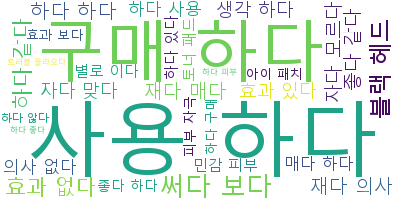

In [ ]:
# WordCloud 라이브러리를 임포트합니다. 텍스트 데이터의 빈도수를 시각화하기 위한 도구입니다.
from wordcloud import WordCloud

# 한글 폰트 경로를 지정합니다. WordCloud에서 한글을 정상적으로 표시하기 위한 준비 단계입니다.
font_path = '/content/malgun.ttf'

# WordCloud 객체를 생성합니다. 여기서는 배경색을 흰색으로, 최대 단어 수를 50개로 설정합니다.
wc = WordCloud(background_color='white', max_words=50, font_path=font_path)

# 단어 빈도 사전을 생성합니다. 이는 WordCloud생성에 사용될 데이터입니다.
count_dic = dict(zip(word_count_tf['단어'], word_count_tf['빈도']))

# WordCloud를 이용해 단어 빈도를 시각화합니다. 이는 가장 많이 사용된 단어를 시각적으로 확인하기 위한 단계입니다.
cloud = wc.fit_words(count_dic)
cloud.to_image()

## 스킨케어

In [ ]:
import pandas as pd
data = pd.read_csv('olive_all_real.csv',encoding='utf-8-sig')

In [ ]:
data = data.iloc[:,1:]
data = data.drop(columns=['positive_prob','negative_prob','sentiment_score','predicted_sentiment','actual_sentiment','select_1_content','select_2_title','select_2_content','select_3_title','select_3_content'])

In [ ]:
data_skin = data[data['big_category']=='스킨케어']
data_skin_positive=data_skin[data_skin['rate']>=4]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=30, ngram_range=(2, 2)) ### 최대개수설정

tdm = cv.fit_transform(data_skin_positive['okt_tokens'])

# 단어와 그 빈도수를 담은 데이터프레임을 생성
word_count_tf = pd.DataFrame({'단어':cv.get_feature_names_out(),'빈도':tdm.sum(axis=0).flat})

# 단어 빈도수를 기준으로 내림차순으로 정렬
word_count_tf = word_count_tf.sort_values('빈도',ascending=False)

word_count_tf = word_count_tf.reset_index(drop=True)
word_count_tf.index = word_count_tf.index + 1
print(word_count_tf)

         단어     빈도
1     사용 하다  15297
2     구매 하다   7875
3     하다 좋다   4268
4     좋다 같다   4194
5     써다 보다   3382
6    사용 해보다   2280
7     하다 있다   2203
8     흡수 되다   2139
9     추천 하다   2113
10    쓰다 있다   1996
11    쓰기 좋다   1907
12    자극 없다   1868
13    사용 있다   1842
14    자다 맞다   1828
15    하다 사용   1741
16   추천 드리다   1594
17    자다 사용   1547
18    제품 이다   1524
19    스킨 케어   1491
20    하다 같다   1481
21    효과 있다   1451
22    재다 하다   1450
23    되다 같다   1431
24    하다 제품   1414
25    있다 같다   1411
26    생각 하다   1374
27    좋다 하다   1361
28    피부 타입   1326
29    자다 쓰다   1324
30  꾸준하다 사용   1308


In [ ]:
# TF-IDF 변환
trans = TfidfTransformer()
dtm2 = trans.fit_transform(tdm)

# TF-IDF DataFrame 생성
df2 = pd.DataFrame({
    '단어': cv.get_feature_names_out(),
    'tf-idf': dtm2.sum(axis=0).flat
})

# TF-IDF 기준 정렬
df2 = df2.sort_values('tf-idf', ascending=False).reset_index(drop=True)
df2.index = df2.index + 1

print("🔹 2-gram TF-IDF 결과:\n", df2)

🔹 2-gram TF-IDF 결과:
          단어       tf-idf
1     사용 하다  4717.656954
2     구매 하다  3469.198427
3     좋다 같다  2055.802989
4     하다 좋다  1880.136539
5     써다 보다  1831.933893
6     쓰기 좋다  1232.518611
7     흡수 되다  1200.308753
8     자극 없다  1178.768529
9     추천 하다  1124.805649
10    쓰다 있다  1112.916852
11   사용 해보다  1039.095771
12    자다 맞다   951.558258
13    하다 있다   939.245134
14    사용 있다   913.094952
15    재다 하다   870.298852
16    자다 사용   822.614354
17    좋다 하다   819.974922
18    효과 있다   802.106131
19    자다 쓰다   793.694055
20    제품 이다   787.091101
21   추천 드리다   785.098608
22    되다 같다   784.366582
23    스킨 케어   761.769765
24    하다 사용   756.776249
25    하다 같다   747.292585
26    있다 같다   689.863602
27    생각 하다   665.295038
28    하다 제품   664.125334
29  꾸준하다 사용   652.280149
30    피부 타입   620.344297


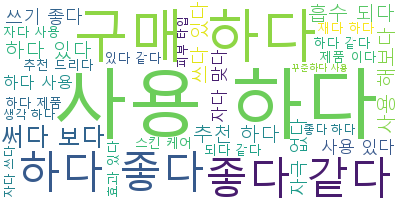

In [ ]:
# WordCloud 라이브러리를 임포트합니다. 텍스트 데이터의 빈도수를 시각화하기 위한 도구입니다.
from wordcloud import WordCloud

# 한글 폰트 경로를 지정합니다. WordCloud에서 한글을 정상적으로 표시하기 위한 준비 단계입니다.
font_path = '/content/malgun.ttf'

# WordCloud 객체를 생성합니다. 여기서는 배경색을 흰색으로, 최대 단어 수를 50개로 설정합니다.
wc = WordCloud(background_color='white', max_words=50, font_path=font_path)

# 단어 빈도 사전을 생성합니다. 이는 WordCloud생성에 사용될 데이터입니다.
count_dic = dict(zip(word_count_tf['단어'], word_count_tf['빈도']))

# WordCloud를 이용해 단어 빈도를 시각화합니다. 이는 가장 많이 사용된 단어를 시각적으로 확인하기 위한 단계입니다.
cloud = wc.fit_words(count_dic)
cloud.to_image()

In [ ]:
data_skin_negative=data_skin[data_skin['rate']<=2]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=30, ngram_range=(2, 2)) ### 최대개수설정

tdm = cv.fit_transform(data_skin_negative['okt_tokens'])

# 단어와 그 빈도수를 담은 데이터프레임을 생성
word_count_tf = pd.DataFrame({'단어':cv.get_feature_names_out(),'빈도':tdm.sum(axis=0).flat})

# 단어 빈도수를 기준으로 내림차순으로 정렬
word_count_tf = word_count_tf.sort_values('빈도',ascending=False)

word_count_tf = word_count_tf.reset_index(drop=True)
word_count_tf.index = word_count_tf.index + 1
print(word_count_tf)

          단어   빈도
1      사용 하다  640
2      구매 하다  421
3      써다 보다  208
4      자다 맞다  144
5   피부 뒤집어지다  135
6     자다 모르다  122
7      하다 사용  112
8      하다 같다  105
9   트러블 올라오다  105
10     피부 타입  103
11     피부 맞다  103
12     좋다 하다  103
13     효과 있다   98
14     하다 피부   97
15     하다 구매   97
16     민감 피부   94
17     효과 없다   93
18     좋다 같다   88
19     재다 의사   87
20     하다 하다   86
21     하다 좋다   85
22     재다 매다   85
23     맞다 같다   84
24     쓰다 있다   81
25     쓰다 피부   80
26     중단 하다   80
27     맞다 않다   79
28     생각 하다   78
29     사용 중단   76
30     스킨 케어   73


In [ ]:
# TF-IDF 변환
trans = TfidfTransformer()
dtm2 = trans.fit_transform(tdm)

# TF-IDF DataFrame 생성
df2 = pd.DataFrame({
    '단어': cv.get_feature_names_out(),
    'tf-idf': dtm2.sum(axis=0).flat
})

# TF-IDF 기준 정렬
df2 = df2.sort_values('tf-idf', ascending=False).reset_index(drop=True)
df2.index = df2.index + 1

print("🔹 2-gram TF-IDF 결과:\n", df2)

🔹 2-gram TF-IDF 결과:
           단어      tf-idf
1      사용 하다  225.662487
2      구매 하다  170.756712
3      써다 보다  101.345983
4     자다 모르다   81.827763
5   피부 뒤집어지다   75.078740
6      좋다 하다   62.763004
7      피부 맞다   62.705802
8      자다 맞다   62.221133
9      효과 없다   60.136848
10  트러블 올라오다   59.330370
11     재다 의사   58.599445
12     효과 있다   57.783218
13     민감 피부   55.413524
14     쓰다 있다   52.749257
15     하다 같다   52.216028
16     좋다 같다   51.978675
17     쓰다 피부   51.481024
18     하다 사용   51.097435
19     재다 매다   49.659008
20     하다 구매   48.065856
21     맞다 같다   46.981407
22     하다 피부   45.519227
23     하다 좋다   44.378928
24     하다 하다   43.979072
25     생각 하다   42.906276
26     피부 타입   41.978428
27     중단 하다   39.777330
28     맞다 않다   35.751883
29     사용 중단   34.964268
30     스킨 케어   32.888233


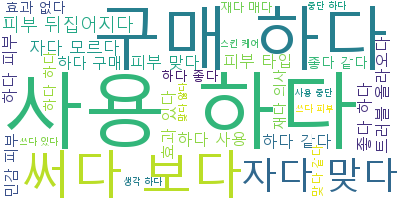

In [ ]:
# WordCloud 라이브러리를 임포트합니다. 텍스트 데이터의 빈도수를 시각화하기 위한 도구입니다.
from wordcloud import WordCloud

# 한글 폰트 경로를 지정합니다. WordCloud에서 한글을 정상적으로 표시하기 위한 준비 단계입니다.
font_path = '/content/malgun.ttf'

# WordCloud 객체를 생성합니다. 여기서는 배경색을 흰색으로, 최대 단어 수를 50개로 설정합니다.
wc = WordCloud(background_color='white', max_words=50, font_path=font_path)

# 단어 빈도 사전을 생성합니다. 이는 WordCloud생성에 사용될 데이터입니다.
count_dic = dict(zip(word_count_tf['단어'], word_count_tf['빈도']))

# WordCloud를 이용해 단어 빈도를 시각화합니다. 이는 가장 많이 사용된 단어를 시각적으로 확인하기 위한 단계입니다.
cloud = wc.fit_words(count_dic)
cloud.to_image()

## 선케어

In [ ]:
import pandas as pd
data = pd.read_csv('olive_all_real.csv',encoding='utf-8-sig')

In [ ]:
data = data.iloc[:,1:]
data = data.drop(columns=['positive_prob','negative_prob','sentiment_score','predicted_sentiment','actual_sentiment','select_1_content','select_2_title','select_2_content','select_3_title','select_3_content'])

In [ ]:
data_sun = data[data['big_category']=='선케어']
data_sun_positive=data_sun[data_sun['rate']>=4]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=30, ngram_range=(2, 2)) ### 최대개수설정

tdm = cv.fit_transform(data_sun_positive['okt_tokens'])

# 단어와 그 빈도수를 담은 데이터프레임을 생성
word_count_tf = pd.DataFrame({'단어':cv.get_feature_names_out(),'빈도':tdm.sum(axis=0).flat})

# 단어 빈도수를 기준으로 내림차순으로 정렬
word_count_tf = word_count_tf.sort_values('빈도',ascending=False)

word_count_tf = word_count_tf.reset_index(drop=True)
word_count_tf.index = word_count_tf.index + 1
print(word_count_tf)

         단어    빈도
1     사용 하다  4187
2     구매 하다  2372
3     좋다 같다  1231
4   선크림 바르다  1210
5     하다 좋다  1170
6    자외선 차단   990
7     써다 보다   900
8    바르다 좋다   880
9    바르다 있다   793
10    화장 하다   728
11    하다 있다   724
12    발림 좋다   648
13    추천 하다   647
14    발림 성도   643
15    톤업 되다   639
16    자다 사용   613
17   톤업 선크림   571
18    쓰다 있다   530
19    하다 않다   527
20   자다 발리다   521
21    마음 들다   520
22    하다 같다   520
23    사용 있다   517
24   사용 해보다   516
25    않다 좋다   514
26    쓰기 좋다   471
27    자다 쓰다   471
28   추천 드리다   465
29    있다 좋다   460
30   하다 바르다   457


In [ ]:
# TF-IDF 변환
trans = TfidfTransformer()
dtm2 = trans.fit_transform(tdm)

# TF-IDF DataFrame 생성
df2 = pd.DataFrame({
    '단어': cv.get_feature_names_out(),
    'tf-idf': dtm2.sum(axis=0).flat
})

# TF-IDF 기준 정렬
df2 = df2.sort_values('tf-idf', ascending=False).reset_index(drop=True)
df2.index = df2.index + 1

print("🔹 2-gram TF-IDF 결과:\n", df2)

🔹 2-gram TF-IDF 결과:
          단어       tf-idf
1     사용 하다  1420.585193
2     구매 하다  1039.304220
3   선크림 바르다   571.865876
4     좋다 같다   561.410935
5     하다 좋다   549.989679
6    바르다 좋다   511.944791
7     써다 보다   505.567066
8    자외선 차단   491.823347
9     발림 좋다   408.777658
10    발림 성도   395.837204
11   바르다 있다   392.998479
12    화장 하다   374.899777
13    톤업 되다   361.042010
14    추천 하다   359.646522
15    하다 있다   314.902370
16   자다 발리다   312.615183
17    않다 좋다   306.597471
18    쓰기 좋다   303.066143
19    자다 사용   300.388459
20    쓰다 있다   300.139491
21   톤업 선크림   288.882248
22    마음 들다   279.721107
23    자다 쓰다   278.589873
24   사용 해보다   272.715436
25    하다 같다   269.547492
26    사용 있다   267.051398
27    하다 않다   256.187544
28    있다 좋다   253.484317
29   하다 바르다   244.007948
30   추천 드리다   238.083919


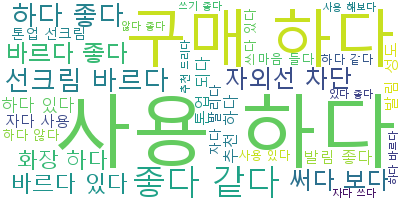

In [ ]:
# WordCloud 라이브러리를 임포트합니다. 텍스트 데이터의 빈도수를 시각화하기 위한 도구입니다.
from wordcloud import WordCloud

# 한글 폰트 경로를 지정합니다. WordCloud에서 한글을 정상적으로 표시하기 위한 준비 단계입니다.
font_path = '/content/malgun.ttf'

# WordCloud 객체를 생성합니다. 여기서는 배경색을 흰색으로, 최대 단어 수를 50개로 설정합니다.
wc = WordCloud(background_color='white', max_words=50, font_path=font_path)

# 단어 빈도 사전을 생성합니다. 이는 WordCloud생성에 사용될 데이터입니다.
count_dic = dict(zip(word_count_tf['단어'], word_count_tf['빈도']))

# WordCloud를 이용해 단어 빈도를 시각화합니다. 이는 가장 많이 사용된 단어를 시각적으로 확인하기 위한 단계입니다.
cloud = wc.fit_words(count_dic)
cloud.to_image()

In [ ]:
data_sun_negative=data_sun[data_sun['rate']<=2]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=30, ngram_range=(2, 2)) ### 최대개수설정

tdm = cv.fit_transform(data_sun_negative['okt_tokens'])

# 단어와 그 빈도수를 담은 데이터프레임을 생성
word_count_tf = pd.DataFrame({'단어':cv.get_feature_names_out(),'빈도':tdm.sum(axis=0).flat})

# 단어 빈도수를 기준으로 내림차순으로 정렬
word_count_tf = word_count_tf.sort_values('빈도',ascending=False)

word_count_tf = word_count_tf.reset_index(drop=True)
word_count_tf.index = word_count_tf.index + 1
print(word_count_tf)

         단어   빈도
1     구매 하다  167
2     사용 하다  150
3    시간 지나다   66
4     써다 보다   59
5   선크림 바르다   52
6     재다 의사   51
7    얼굴 바르다   45
8    자외선 차단   44
9     화장 하다   41
10    좋다 같다   41
11    의사 없다   40
12    자다 맞다   40
13    하다 하다   39
14    발림 성은   37
15   톤업 선크림   35
16    민감 피부   34
17    하다 같다   34
18   바르다 피부   33
19    톤업 효과   32
20    별로 이다   32
21    되다 같다   32
22   바르다 얼굴   32
23   펴다 바르다   31
24   자다 모르다   31
25    파다 프리   30
26    발림 좋다   29
27    하다 않다   28
28    피부 좋다   28
29    재다 매다   27
30   하다 바르다   26


In [ ]:
# TF-IDF 변환
trans = TfidfTransformer()
dtm2 = trans.fit_transform(tdm)

# TF-IDF DataFrame 생성
df2 = pd.DataFrame({
    '단어': cv.get_feature_names_out(),
    'tf-idf': dtm2.sum(axis=0).flat
})

# TF-IDF 기준 정렬
df2 = df2.sort_values('tf-idf', ascending=False).reset_index(drop=True)
df2.index = df2.index + 1

print("🔹 2-gram TF-IDF 결과:\n", df2)

🔹 2-gram TF-IDF 결과:
          단어     tf-idf
1     구매 하다  76.061671
2     사용 하다  62.713011
3    시간 지나다  37.733424
4     화장 하다  32.682053
5     써다 보다  30.979692
6   선크림 바르다  29.261443
7    얼굴 바르다  27.158518
8     발림 성은  26.333867
9     자다 맞다  24.789440
10    재다 의사  24.510353
11    좋다 같다  24.446499
12    민감 피부  22.740416
13   자외선 차단  22.030850
14   바르다 얼굴  21.803925
15   바르다 피부  21.304570
16    하다 같다  20.499346
17    발림 좋다  20.073113
18    되다 같다  20.001510
19    하다 하다  19.903513
20   자다 모르다  19.657406
21    의사 없다  19.263502
22    피부 좋다  18.132649
23    재다 매다  18.047888
24    별로 이다  17.850505
25    하다 않다  16.703636
26   톤업 선크림  16.171540
27   하다 바르다  15.910582
28   펴다 바르다  15.092101
29    파다 프리  12.520925
30    톤업 효과  12.019963


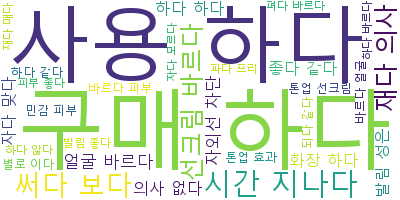

In [ ]:
# WordCloud 라이브러리를 임포트합니다. 텍스트 데이터의 빈도수를 시각화하기 위한 도구입니다.
from wordcloud import WordCloud

# 한글 폰트 경로를 지정합니다. WordCloud에서 한글을 정상적으로 표시하기 위한 준비 단계입니다.
font_path = '/content/malgun.ttf'

# WordCloud 객체를 생성합니다. 여기서는 배경색을 흰색으로, 최대 단어 수를 50개로 설정합니다.
wc = WordCloud(background_color='white', max_words=50, font_path=font_path)

# 단어 빈도 사전을 생성합니다. 이는 WordCloud생성에 사용될 데이터입니다.
count_dic = dict(zip(word_count_tf['단어'], word_count_tf['빈도']))

# WordCloud를 이용해 단어 빈도를 시각화합니다. 이는 가장 많이 사용된 단어를 시각적으로 확인하기 위한 단계입니다.
cloud = wc.fit_words(count_dic)
cloud.to_image()